## Data Preparation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


In [51]:
import pandas as pd

output_path = './F_Energy.csv'
path = output_path
df = pd.read_csv(output_path) 
display(df.head())

,Pretty Formula,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
0,B13C2,2.438648,-106.358032,-7.090535,112.056191,-0.072416,0.0089
1,SiB3,2.449974,-204.992906,-6.406028,328.145035,-0.040804,1.4083
2,SnB6,4.110240,-42.852113,-6.121730,74.164800,0.175492,0.7527
3,B6Pb,6.003820,-42.968600,-6.138371,75.248129,0.114862,0.9209
4,BN,3.302143,-68.876677,-8.609585,49.920018,-1.294085,4.7885


In [52]:
df.info()
df.describe(include='all').round(2)

#round 函数在 Python（包括 Pandas 库中）的功能是对浮点数进行四舍五入到给定的精度。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pretty Formula             194 non-null    object 
 1   Density                    194 non-null    float64
 2   Energy                     194 non-null    float64
 3   Energy_per_Atom            194 non-null    float64
 4   Volume                     194 non-null    float64
 5   Formation_Energy_per_Atom  194 non-null    float64
 6   Band Gap                   194 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.7+ KB


,Pretty Formula,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
count,194,194.00,194.00,194.00,194.00,194.00,194.00
unique,194,NaN,NaN,NaN,NaN,NaN,NaN
top,B13C2,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.01,-102.56,-4.38,617.60,-0.65,1.96
std,NaN,1.84,134.24,1.50,867.71,0.94,1.54
min,NaN,0.14,-787.96,-8.61,27.98,-3.89,0.00
25%,NaN,2.60,-117.10,-5.29,147.24,-1.12,0.80
50%,NaN,3.85,-54.00,-4.17,334.98,-0.44,1.74
75%,NaN,5.07,-24.22,-3.18,720.48,-0.07,2.85


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y= df['Formation_Energy_per_Atom']
x= df.drop(columns=['Energy','Formation_Energy_per_Atom','Volume','Pretty Formula'])
display(x.head(5))
# print(set(x), set(y))

,Density,Energy_per_Atom,Band Gap
0,2.438648,-7.090535,0.0089
1,2.449974,-6.406028,1.4083
2,4.110240,-6.121730,0.7527
3,6.003820,-6.138371,0.9209
4,3.302143,-8.609585,4.7885


In [54]:
# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [55]:
print(x_test)

      Density  Energy_per_Atom  Band Gap
28   2.650776        -3.280608    4.0967
185  4.744109        -2.401722    0.7943
59   8.060086        -2.990405    0.1245
13   1.502003        -4.811301    0.9011
51   4.038728        -3.113820    2.1877
132  4.494691        -4.957211    0.2335
181  3.925633        -2.110448    0.8854
127  3.532758        -5.095090    1.9582
104  3.670089        -4.467779    1.4368
126  1.762487        -5.099107    1.7095
186  2.282502        -2.499673    2.4608
133  2.321456        -6.968631    5.5685
106  6.190813        -3.861458    0.0428
129  2.046549        -6.008801    0.0495
34   5.488994        -5.817217    0.0091
103  5.069638        -5.526139    0.4815
190  3.718186        -1.924661    2.4800
102  5.408432        -4.415813    0.3924
91   4.730928        -4.692443    0.7104
143  6.047494        -3.752366    0.4034
92   5.968561        -6.409977    1.3715
138  2.516563        -2.964350    3.3255
119  6.261927        -3.235201    3.1232
171  4.856168   

##  data visualization


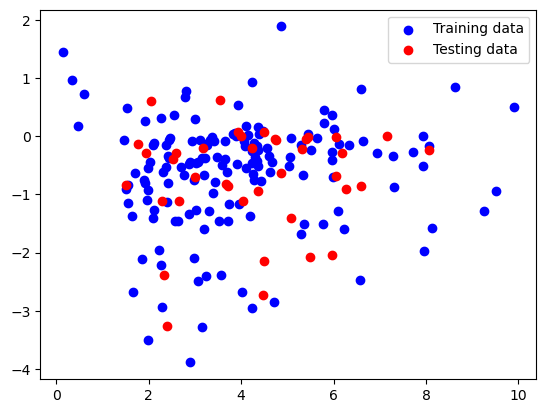

In [56]:
plt.scatter(x_train['Density'], y_train, color='blue', label='Training data')
plt.scatter(x_test['Density'], y_test, color='red', label='Testing data')
plt.legend()
plt.show()

## Build ANN model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
    # Dense(1, input_shape=(1,), activation='linear')
#     Dense(5, input_shape=(x.shape[1],), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(x.shape[1],), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


## Training ANN model

In [82]:
from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=5)

Epoch 1/200
25/25 [==============================] - 1s 11ms/step - loss: 1.1551 - val_loss: 0.7541
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 0.9219 - val_loss: 0.7035
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.8064 - val_loss: 0.6811
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.7365 - val_loss: 0.6656
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6886 - val_loss: 0.6500
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6581 - val_loss: 0.6409
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6349 - val_loss: 0.6421
Epoch 8/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6179 - val_loss: 0.6377
Epoch 9/200
25/25 [==============================] - 0s 6ms/step - loss: 0.5979 - val_loss: 0.6221
Epoch 10/200
25/25 [==============================] - 0s 6ms/step - loss: 0.5830 - val_loss: 0.6164
Epoch 11

## Model evaluation

In [83]:
history.history['loss'][:10]

[1.1551131010055542,
 0.9218513369560242,
 0.8063775897026062,
 0.7364998459815979,
 0.688595175743103,
 0.6581190824508667,
 0.6348550319671631,
 0.6178807616233826,
 0.5978507995605469,
 0.5829806327819824]

2/2 [==============================] - 0s 5ms/step - loss: 0.5501


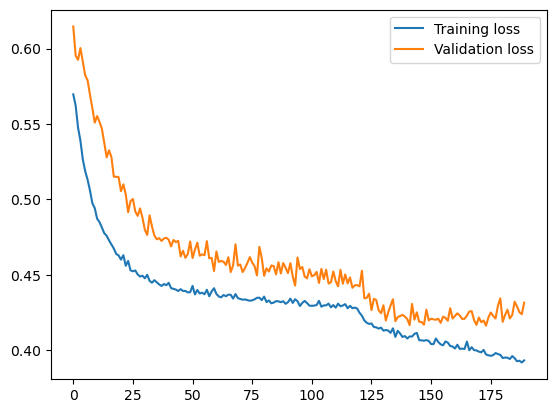

In [84]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 绘制训练历史
plt.plot(history.history['loss'][10:], label='Training loss')
plt.plot(history.history['val_loss'][10:], label='Validation loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 5ms/step


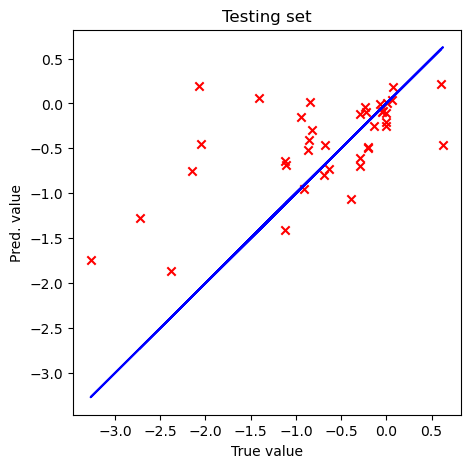

5/5 [==============================] - 0s 3ms/step


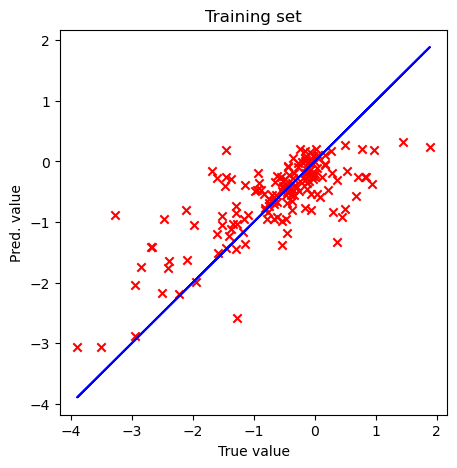

In [85]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


5/5 [==============================] - 0s 3ms/step


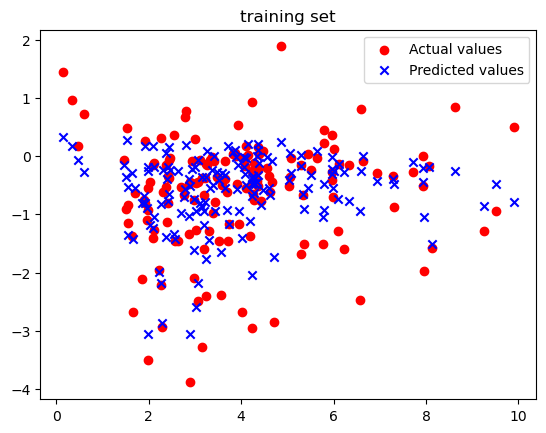

2/2 [==============================] - 0s 5ms/step


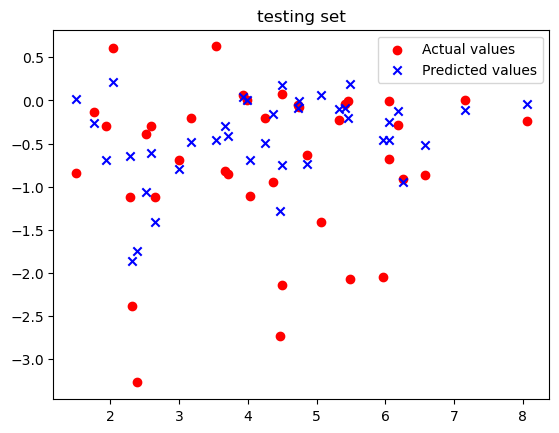

In [86]:
y_pred = model.predict(x_train)
plt.scatter(x_train['Density'], y_train, color='red', label='Actual values')
plt.scatter(x_train['Density'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test['Density'], y_test, color='red', label='Actual values')
plt.scatter(x_test['Density'], y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [87]:
## Coefficient of determination, denoted R2
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_pred)

y_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_pred)

print(r2_train, r2_test)

5/5 [==============================] - 0s 3ms/step
0.5560488258782595 0.29005763157865483


In [88]:
## Pearson correlation function
from sklearn.datasets import make_regression
from sklearn.feature_selection import r_regression

y_pred = model.predict(x_test)
psc_test = r_regression(y_test.to_numpy().reshape(-1, 1) , y_pred.ravel())[0]
y_pred = model.predict(x_train)
psc_train = r_regression(y_train.to_numpy().reshape(-1, 1), y_pred.ravel())[0]
print(psc_test, psc_train)

5/5 [==============================] - 0s 2ms/step
0.6171401420213389 0.7496081987966099
